sql engine ready
Model Accuracy Metrics:
Mean Absolute Error (MAE): 0.50
Mean Squared Error (RMSE): 2.65
Root Mean Squared Error (RMSE): 1.63
R-squared (Accuracy): 0.98


Mean Squared Error: 2.6478672135783965


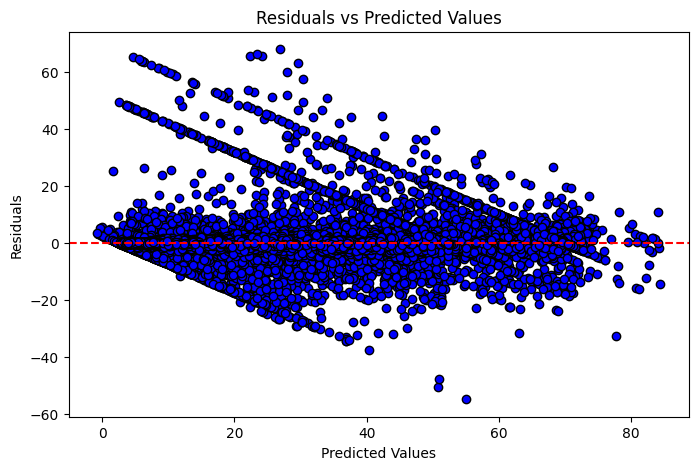

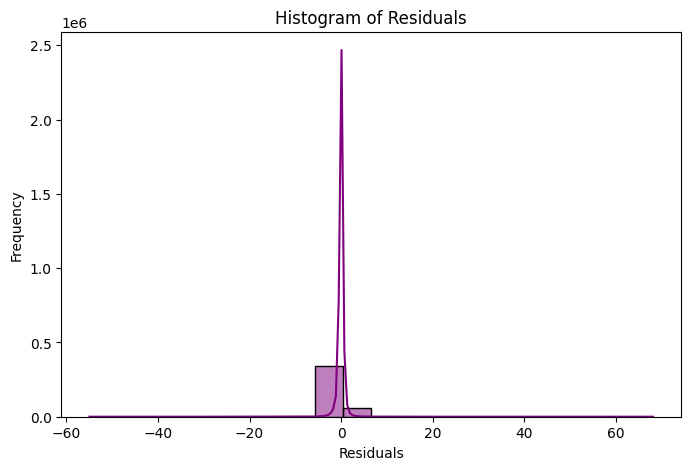

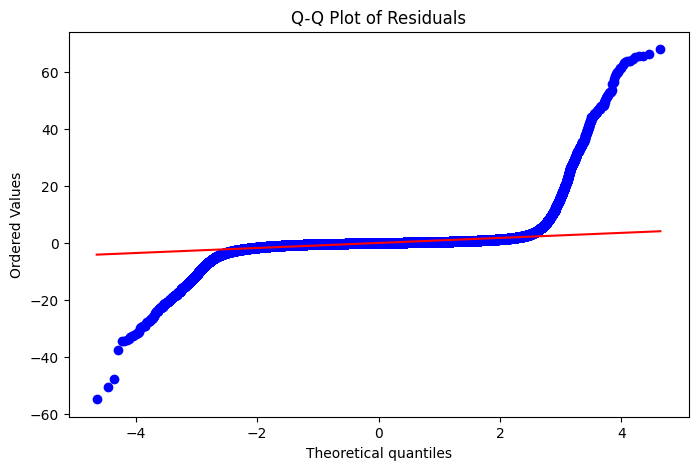

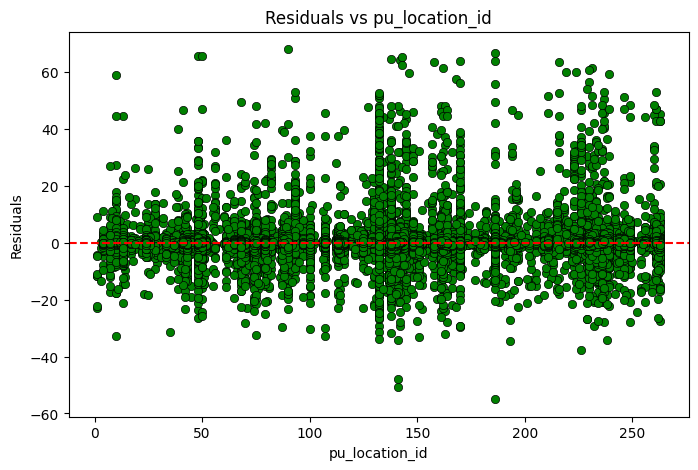

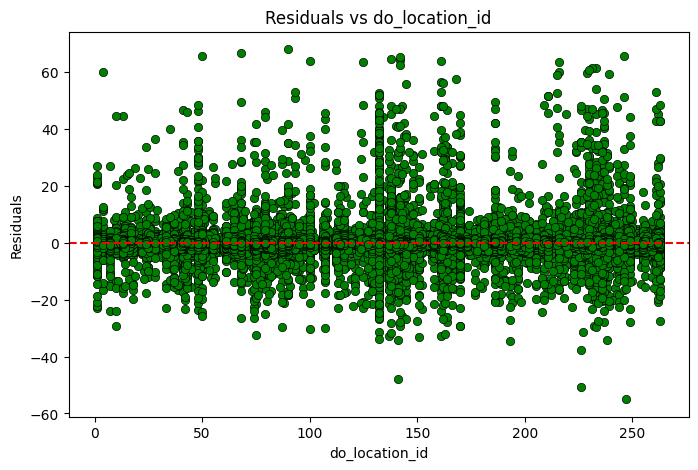

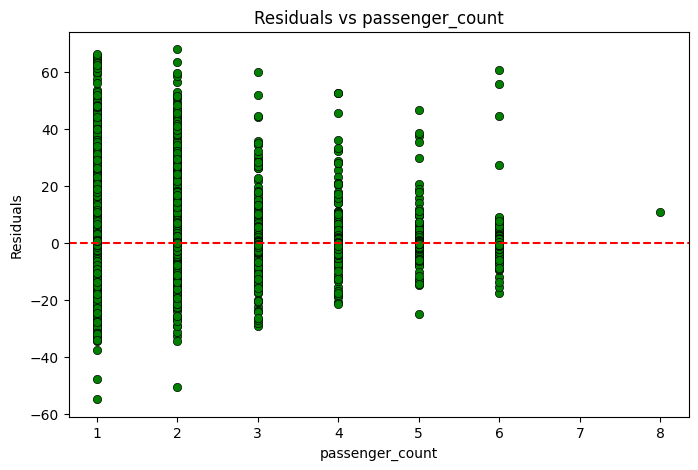

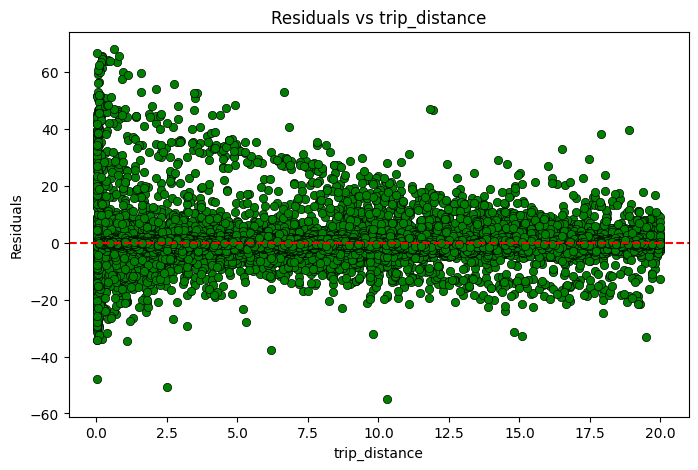

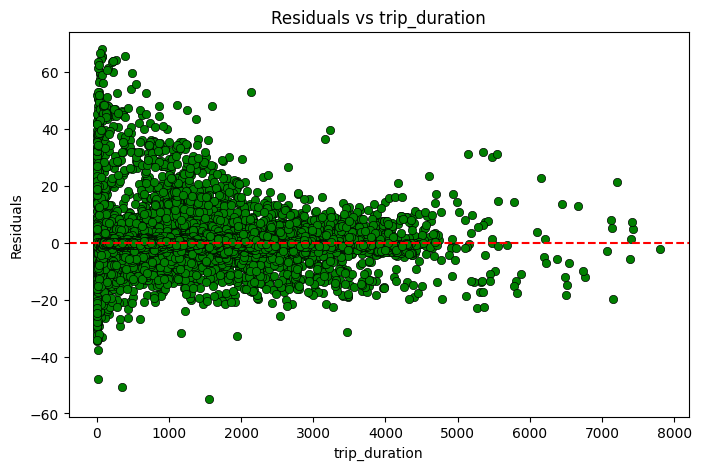

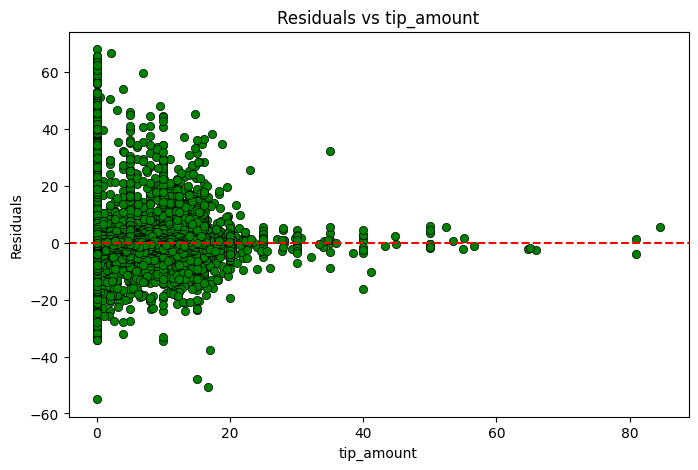

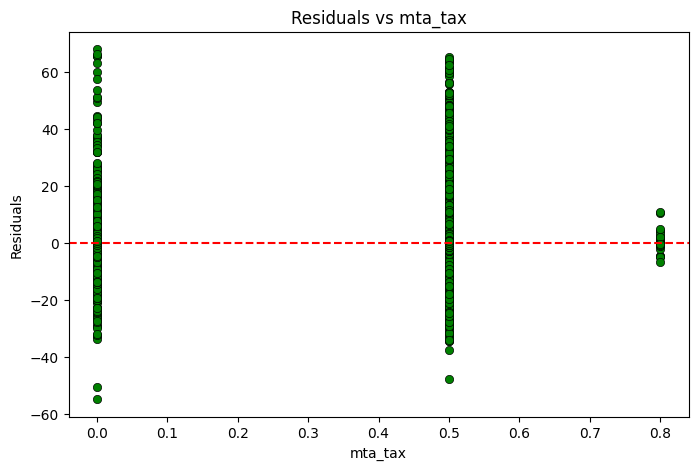

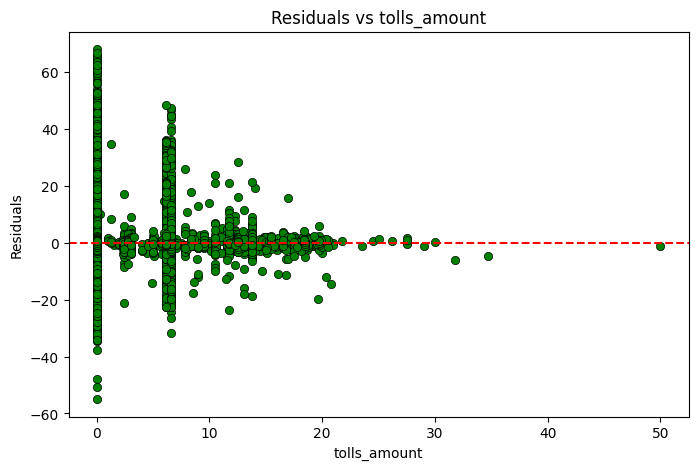

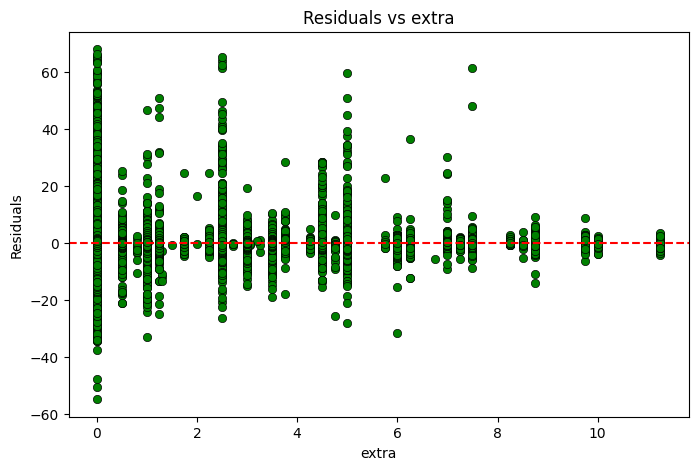

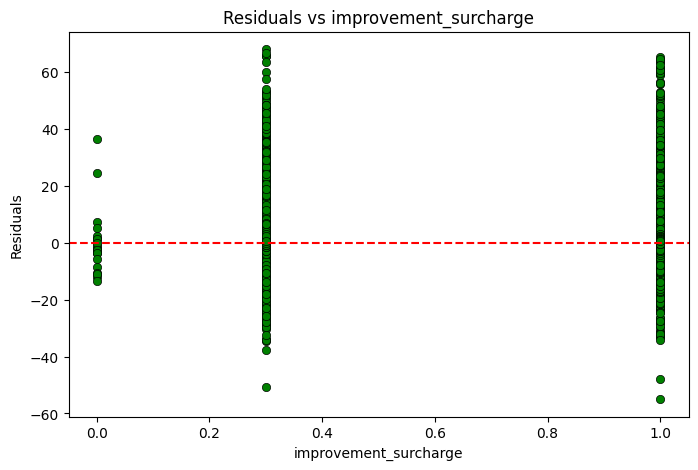

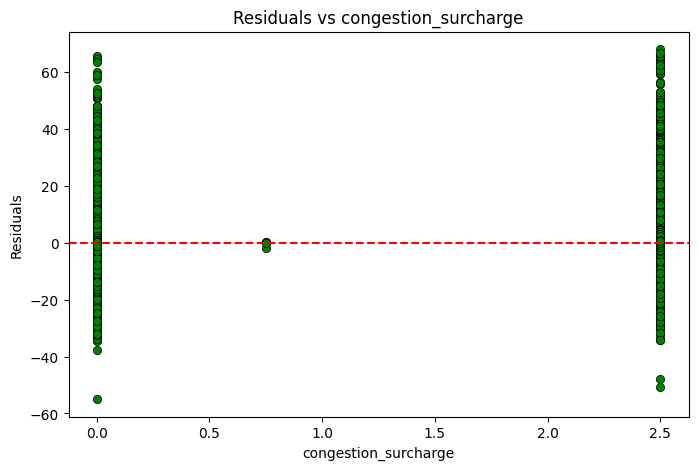

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from data import *
from model import *

taxi_type = YELLOW
sql = getSqlForModeling2(taxi_type)
df = getDF(sql)

X = df[FEATURES]
y = df[VARIABLE]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GradientBoostingRegressor(n_estimators=500, 
                                  learning_rate=0.1, 
                                  max_depth=3,
                                  validation_fraction=0.1, 
                                  n_iter_no_change=10)

# Training
model.fit(X, y)
# with DR.engn.connect() as conn:
#     processed = 0
#     for df in pd.read_sql(train_sql, conn, chunksize=CHUNK_SIZE):
#         processed += len(df)
#         X = df[FEATURES]
#         y = df[VARIABLE]

#         model.fit(X, y)
#         O.out(f'Trained {processed} rows')

storeModel(model, f'{taxi_type}_{VARIABLE}_{GRADIENT_BOOST}')

# Predictions
# with DR.engn.connect() as conn:
#     processed = 0
#     y_test = []
#     y_pred = []
#     for df in pd.read_sql(test_sql, conn, chunksize=CHUNK_SIZE):
#         processed += len(df)
#         X = df[FEATURES]
#         y_test.append(df[VARIABLE])

#         y_pred.append(model.predict(X))
#         O.out(f'Predicted {processed} rows')

# # Performance
# merged_y_test = pd.concat(y_test, ignore_index=True)
# merged_y_pred = np.concatenate(y_pred)

# showPerformance(merged_y_test, merged_y_pred)
y_pred = model.predict(X_test)
showPerformance(y_test, y_pred)
residualAnalysis(X_test, y_test, y_pred)

In [ ]:
# Residual Analysis - needs restart
from data import *
from model import *

taxi_type = YELLOW
# train_sql = getSqlForModeling(taxi_type, isTrain=True)
test_sql = getSqlForModeling(taxi_type, isTrain=False)

model = loadModel(f'{taxi_type}_{VARIABLE}_{GRADIENT_BOOST}')

# Predictions
with DR.engn.connect() as conn:
    processed = 0
    y_t_chunk = []
    y_p_chunk = []
    X_t_chunk = []
    for df in pd.read_sql(test_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        X_t_chunk.append(X)
        y_t_chunk.append(df[VARIABLE])

        y_p_chunk.append(model.predict(X))
        O.out(f'Predicted {processed} rows')

# Performance
X_test = pd.concat(X_t_chunk, ignore_index=True)
y_test = pd.concat(y_t_chunk, ignore_index=True)
y_pred = np.concatenate(y_p_chunk)


residualAnalysis(X_test, y_test, y_pred)